# Skew Normal Distribution
**Sunney Fotedar**

Background
- Skew nowmal distribution is a continuous probability distribution that generalized the normal distribution. See [Azzalini, A., & Capitanio, A. (1999)](http://www.jstor.org/stable/2680724) for more details and generalizations to multivariate skew normal distributions.
- In our work we have considered the variable $p_{jk}$ for each $j\in \mathcal{J}$ and $k \in \mathcal{N}_{j}$ (note that each $p_{jk}$ value is an independent random variable) to be skew normally distributed and used different skewness/shape parameter ($\alpha$) to generate various instances.

Details
 - We know that probability density function (pdf) of the standard normal distribution is $\phi(x) = \frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}}$ and the cumulative distribution function given by $\Phi(x) = \int_{-\infty}^{x} \phi(t)dt$. The pdf of the skew normal distribution with skewness/shape parameter $\alpha$ is given by $f(x) = 2\phi(x)\Phi(\alpha x)$
 - Above mentioned formulae is in the standard form and to add location $\mu$ and scale $\sigma$ parameters we use $x \rightarrow \frac{x-\mu}{\sigma}$
 - For processing times as mentioned in Section 6.1 (paragraph 2 line 5) of the manuscript we select the parameter $\mu$ based on the values of processing time of the same job on similar types of machines. In Section 6.2 line 4 we have provided the minimum, maximum, and median values of the known processing time $p_{jk}$ for $j \in \mathcal{J}$ and $k\in \mathcal{K}_{j}\setminus \mathcal{N}_{j}$.
 - It is also mentioned in Section 6.1 paragraph 2 line 7 that $\sigma=0.1\mu$
 - The above mentioned values of the parameters along with $\alpha=1$(skew+), $\alpha=0$(skew0), $\alpha=-1$(skew-) are tried while generation the results.

Summary

### Cumulative distribution function plot

**Now we evaluate the cumulative distribution function for any given $j\in \mathcal{J}, k \in \mathcal{N}_{j}$ with $p_{jk}=0$ i.e. $F(p_{jk}=0;\alpha, \mu, \sigma)$ for $\alpha\in \{1,-1,0\}$ and $\mu \in \{0.1, 89.7, 5.63\}$ and $\sigma=0.1\mu$.**

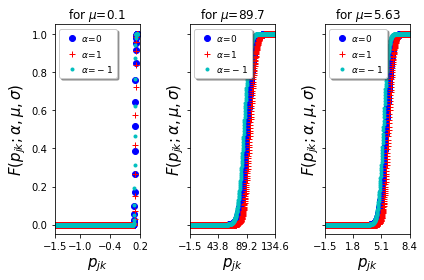

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
mu = [0.1,89.7,5.63]; alpha =[0,1,-1]; 

"""
Create three subplots (one for each value of \mu) 
"""

f, ax = plt.subplots(1, 3, sharey=True)
start=-1.5
end=1.5
for m in mu:
    X = np.linspace(start,end*m,500) # evaluate values from [-2,3*mu]
    G={}
    G['$p_{jk}$'] = X
    for a in alpha:  
     # evaluate the cumulative distribution for each values [-2,5*mu]   
     G[a] = [stats.skewnorm.cdf(x, a, loc=m, scale=.1*m) for x in X ] 
    """
     data frame for cumulative dist.at different values of processing times for each 
     value of skewness 
    """   
    cumDist_forAlpha = pd.DataFrame(data=G, dtype=np.int8) 
    ax[mu.index(m)].plot(X,cumDist_forAlpha[alpha[0]], 'bo', label='$ \\alpha\!=\!0 $'); 
    ax[mu.index(m)].plot(X,cumDist_forAlpha[alpha[1]], 'r+', label="$ \\alpha\!=\!1$");  
    ax[mu.index(m)].plot(X,cumDist_forAlpha[alpha[2]], 'c.', label='$ \\alpha\!=\!-1 $');
    ax[mu.index(m)].set_title('for $\mu$={}'.format(m));
    ax[mu.index(m)].legend(loc="upper left",  shadow=True, handletextpad=0.05, fontsize=9)
    ax[mu.index(m)].set_xlim([start, end*m]);
    ax[mu.index(m)].set_xticks([round(l,1) for l in np.linspace(start,end*m,4)]);
    ax[mu.index(m)].set_xlabel('$p_{jk}$', fontsize=15);
    ax[mu.index(m)].set_ylabel('$F(p_{jk};\\alpha,\mu,\sigma)$', fontsize=15)

   
f.tight_layout()

### Values of $F(0;\alpha,\mu,\sigma)$ for different values of $\alpha$ and $\mu$ (rounded to 10 decimal)

In [11]:
F={}
for skew in [0,1,-1]:
    for mu in [0.1,89.7,5.63]:
        F[skew,mu]= round(stats.skewnorm.cdf(0, skew, loc=mu, scale=.1*mu),10)
        s='F(0;{},{},{})={}'.format(skew,mu,round(0.1*mu,2),F[skew,mu])
        print(s)

F(0;0,0.1,0.01)=0.0
F(0;0,89.7,8.97)=0.0
F(0;0,5.63,0.56)=0.0
F(0;1,0.1,0.01)=0.0
F(0;1,89.7,8.97)=0.0
F(0;1,5.63,0.56)=0.0
F(0;-1,0.1,0.01)=0.0
F(0;-1,89.7,8.97)=0.0
F(0;-1,5.63,0.56)=0.0


**Table 1. Values of cumulative distribution at zero**


| $\alpha$    | $\mu$       |   F(0;$\cdots$)               |
| -----------: | -----------: | ----------------------------------:             |
| 0           | 0.1         |      0                                         |
| 1           | 0.1         |      0                                         |
| -1          | 0.1         |      0                                         |
| 0           | 89.7        |      0                                         |
| 1           | 89.7        |      0                                         |
| -1          | 89.7        |      0                                         |
| 0           | 5.63        |      0                                         |
| 1           | 5.63        |      0                                         |
| -1          | 5.63        |      0                                         |